In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import h5py
from utils import write_unsafe_attrs,read_CSV,create_dataStructure,convert_excel_to_hdf,close_dataset
from tables import *

%matplotlib inline

def init_dataset():
    
    global train_dataset, test_dataset
    [train_dataset, test_dataset] = read_CSV()
    
    store1 = create_dataStructure()
    convert_excel_to_hdf()
    close_dataset()

In [2]:
write_unsafe_attrs()#para evitar una alerta que surge al nombrar las columnas del archivo hdf5
init_dataset()

['State_Code', 'County_Code', 'Site_Num', 'Parameter_Code', 'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter_Name', 'Sample_Duration', 'Pollutant_Standard', 'Metric_Used', 'Method_Name', 'Year', 'Units_of_Measure', 'Event_Type', 'Observation_Count', 'Observation_Percent', 'Completeness_Indicator', 'Valid_Day_Count', 'Required_Day_Count', 'Exceptional_Data_Count', 'Null_Data_Count', 'Primary_Exceedance_Count', 'Secondary_Exceedance_Count', 'Certification_Indicator', 'Num_Obs_Below_MDL', 'Arithmetic_Mean', 'Arithmetic_Standard_Dev', '1st_Max_Value', '1st_Max_DateTime', '2nd_Max_Value', '2nd_Max_DateTime', '3rd_Max_Value', '3rd_Max_DateTime', '4th_Max_Value', '4th_Max_DateTime', '1st_Max_Non_Overlapping_Value', '1st_NO_Max_DateTime', '2nd_Max_Non_Overlapping_Value', '2nd_NO_Max_DateTime', '99th_Percentile', '98th_Percentile', '95th_Percentile', '90th_Percentile', '75th_Percentile', '50th_Percentile', '10th_Percentile', 'Local_Site_Name', 'Address', 'State_Name', 'County_Name', 'City_Na

C:\Users\Innovacion Negocios2\Anaconda3\envs\EsumerBigData\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


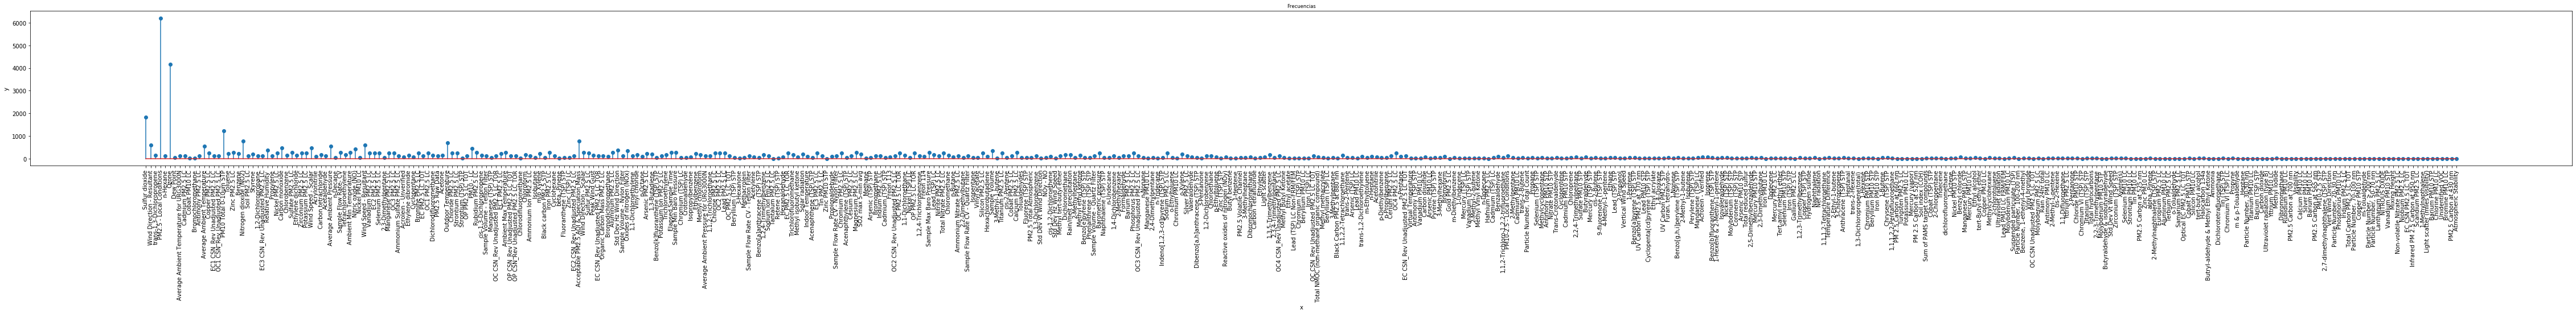

In [3]:
units = train_dataset['Parameter_Name'].unique()#separa los valores unico para el parametro de medida
values = []
for i, item in enumerate(units):  
    values.append(len(train_dataset[train_dataset['Parameter_Name']==item])) #Obtengo un array con las frecuencias ppara cada parametro de medida  


fig, ax = plt.subplots(figsize=(80,5), tight_layout=False)
ax.tick_params(axis='x', rotation=90)
plt.stem(units, values, linefmt=None, markerfmt=None, basefmt=None)
plt.rcParams.update({'font.size': 7})

#plt.plot(x_func, y_func, label='$f(x) = 0.388 x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Frecuencias')
plt.show()

In [4]:
#Analítica sobre el PM2

PM2=train_dataset.Parameter_Name.value_counts().idxmax() #selecciona el valor más frecuente de la columna parametros

train_dataset_clean = train_dataset[train_dataset['Parameter_Name']==PM2]

train_dataset_clean= train_dataset_clean.drop(['CBSA_Name', 
                                               'City_Name',
                                               'County_Name',
                                               'State_Name',
                                               'Address',
                                               'Local_Site_Name',
                                               'Metric_Used',
                                               'Method_Name',
                                               '1st_NO_Max_DateTime',
                                               '1st_Max_Non_Overlapping_Value',
                                               '2nd_Max_Non_Overlapping_Value',
                                              '2nd_NO_Max_DateTime',
                                              'Exceptional_Data_Count',
                                              'Null_Data_Count',
                                              'Primary_Exceedance_Count',
                                              'Secondary_Exceedance_Count',
                                              'Certification_Indicator',
                                              'Num_Obs_Below_MDL','Completeness_Indicator',
                                              'Event_Type','Units_of_Measure','Pollutant_Standard',
                                              'Sample_Duration'], axis=1)

train_dataset_clean.replace('', np.nan, inplace=True)
train_dataset_clean.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print(train_dataset_clean.count)

#Deben Removerse los valores por que 
#son irrelevantes y están incompletos.
#Se puede trabajar con los códigos de área
#local_site_name                  3944
#address                          4171
#state_name                       4175
#county_name                      4175
#city_name                        2849
#cbsa_name                        3737

<bound method DataFrame.count of        State_Code  County_Code  Site_Num  Parameter_Code  POC   Latitude  \
3256            4           23         4           88101    1  31.337204   
4114            6            7         8           88101    1  39.761680   
34774          29          189      3001           88101    2  38.650329   
20184          16           27         2           88101    1  43.580310   
23436          18          127        24           88101    3  41.617500   
...           ...          ...       ...             ...  ...        ...   
839             2           90        10           88101    1  64.840672   
5716            6           27      1003           88101    3  36.487823   
10022           6           71        27           88101    1  34.030833   
7376            6           37      2005           88101    1  34.132600   
35210          29          510        94           88101    4  38.631140   

        Longitude  Datum            Parameter_Name  Ye

In [5]:
#
train_dataset_clean.to_excel("train_dataset_clean.xlsx", sheet_name='Clean')